In [1]:
import tensorflow as tf

2024-03-14 15:29:51.123982: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-14 15:29:53.362532: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-14 15:29:53.362767: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-14 15:29:53.709580: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-14 15:29:54.453045: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-14 15:29:54.454660: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
# Loading the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalizing the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

In [3]:
# Defining the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Setting training parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
print(f'\nModel Training:')
model.fit(training_images, training_labels , epochs=5)

# Evaluting the model
print(f'\nModel Evaluation:')
test_loss = model.evaluate(test_images, test_labels)


Model Training:


2024-03-14 15:30:08.537128: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4983 - accuracy: 0.8256
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3740 - accuracy: 0.8651
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3352 - accuracy: 0.8783
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3128 - accuracy: 0.8849
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2943 - accuracy: 0.8916

Model Evaluation:
 50/313 [===>..........................] - ETA: 0s - loss: 0.3310 - accuracy: 0.8800 

2024-03-14 15:30:30.031438: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 0s 1ms/step - loss: 0.3469 - accuracy: 0.8748


## Convolutional Neural Networks

In [13]:
model = tf.keras.models.Sequential([
    # Adding convolutions and max pooling
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
print(f'\nTRAINING MODEL:')
model.fit(training_images, training_labels, epochs=5)

print(f'\nEVALUATING MODEL:')
test_lost = model.evaluate(test_images, test_labels)


TRAINING MODEL:
Epoch 1/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.3794 - accuracy: 0.8620
Epoch 2/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2493 - accuracy: 0.9082
Epoch 3/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1994 - accuracy: 0.9270
Epoch 4/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1597 - accuracy: 0.9402
Epoch 5/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1283 - accuracy: 0.9515

EVALUATING MODEL:
313/313 [==============================] - 2s 7ms/step - loss: 0.2408 - accuracy: 0.9197


## Visualizing the Convolutions and Pooling

In [6]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


1/1 [==============================] - 0s 13ms/step


IndexError: too many indices for array: array is 2-dimensional, but 4 were indexed

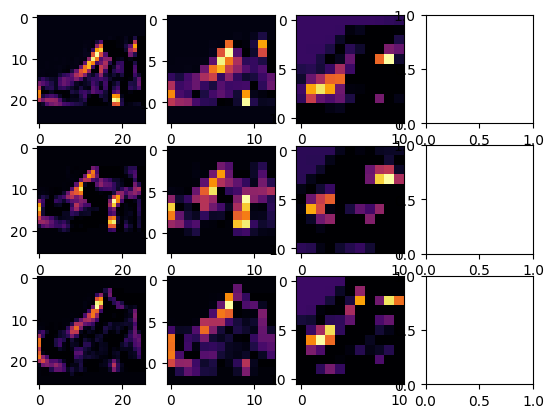

In [8]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE = 0
SECOND_IMAGE = 23
THIRD_IMAGE = 28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1,28,28,1))[x]
    axarr[0,x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)

    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1,28,28,1))[x]
    axarr[1,x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)

    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1,28,28,1))[x]
    axarr[2,x].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)